# *Fake Face Image Classification Challenge*

*Is this Face image fake or real?*

![](https://3.bp.blogspot.com/-AADRULtzSHc/XHzFyxMxx4I/AAAAAAAAB3c/Yl-4CDVSuwQKwQwsCkrWWlYJ9lzTwghigCLcBGAs/s1600/ai-images-news.jpg)

### ***Introduction***


***About*** 

This competition is being organised by the Heuristics Club (a sub-club of KamandPrompt), IIT Mandi for Utkarsh 2021.


***Goal of the Competition***

In the challenge, images of human faces are provided. The goal of this challenge is to classify whether a given image has a real face or a fake face.


***Context***

Nowadays, with the advent of Generative Adversarial Networks (GANs), there are lots of fake images and videos of people on the internet. These algorithms can generate very accurate and realistic looking images and videos. This is a big issue because it can be used to attack public figures, spread fake news, etc. So, to identify whether any particular piece of content is fake or not is an important problem that needs to be tackled.

Since no algorithm is perfect in this task as of now, so this is an interesting problem to solve with deep learning.

![](https://www.iuemag.com/may2013/images/iu-emagazine-best-fake-face-dancing-musical-tunes-silly-crowd-smile-joke-happiness-deliver.png)

***AIM: To classfiy given test image as real(1) or fake(0).***

## ***Technologies used:***
In this notebook, we'll use the following techniques to train a state-of-the-art model in less than 5 minutes to achieve over 97% accuracy in  classifying images from the given dataset:

- Data normalization
- Data augmentation
- Residual connections
- Batch normalization
- Learning rate scheduling
- Weight Decay
- Gradient clipping
- Adam optimizer

### ***How to run the code***
**To run the code you would be required to enter your kaggle credentials in order the data set from kaggle using opendatasets module in python otherwise the notebook won't run!**

### ***So Lets start***

In [1]:
# Make sure to install torch and torchvisionif running locally on jupyter notebook

*Importing important modules*

In [2]:
!pip install opendatasets 
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import opendatasets as od

**Downloading and preparing data by applying transforms on PIL images to convert them to required tensors.**

In [3]:
# uncomment if running on platform other than kaggle then would be required to enter kaggle credentials
# also then remove '/kaggle/input/' from data_dir
# # Dowload the dataset
# od.download('https://www.kaggle.com/c/fake-image-classification-challenge')

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
os.listdir('/kaggle/input/fake-image-classification-challenge')

['data']

In [6]:
os.listdir('/kaggle/input/fake-image-classification-challenge/data')

['sample_submission.csv', 'train.csv', 'test.csv', 'test', 'train']

In [7]:
# uncomment this if running on any other platform
# data_dir = 'fake-image-classification-challenge/data'
data_dir = '/kaggle/input/fake-image-classification-challenge/data'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['sample_submission.csv', 'train.csv', 'test.csv', 'test', 'train']
['fake', 'real']


In [8]:
fake_face_files = os.listdir(data_dir + "/train/fake")
print('No. of training examples for fake faces:', len(fake_face_files))
print(fake_face_files[:5])

No. of training examples for fake faces: 9000
['08450.jpg', '05938.jpg', '06122.jpg', '08536.jpg', '04168.jpg']


In [9]:
real_face_files = os.listdir(data_dir + "/train/real")
print('No. of training examples for real faces:', len(real_face_files))
print(real_face_files[:5])

No. of training examples for real faces: 9000
['08450.jpg', '05938.jpg', '06122.jpg', '08536.jpg', '04168.jpg']


The above directory structure (one folder per class) is used by many computer vision datasets, and most deep learning libraries provide utilites for working with such datasets. We can use the `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [10]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt

dataset = ImageFolder(data_dir+'/train', tt.Compose([tt.Resize(142), 
                                                     tt.RandomHorizontalFlip(), 
                                                      #tt.RandomResizedCrop(64, scale=(0.5,0.9), ratio=(1, 1)), 
                                            #tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                                            #tt.RandomCrop(64, padding=4, padding_mode='reflect'),
                                            tt.ToTensor(),
                                            tt.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
                                            ]))

Let's look at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label. Since the data consists of 142x142 px color images with 3 channels (RGB), each image tensor has the shape `(3,142,142)`.

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 142, 142]) 0


tensor([[[ 0.4851,  0.4851,  0.4851,  ...,  0.5364,  0.5364,  0.5364],
         [ 0.4851,  0.4851,  0.4851,  ...,  0.5536,  0.5364,  0.5364],
         [ 0.4851,  0.4851,  0.4851,  ...,  0.5536,  0.5364,  0.5364],
         ...,
         [-1.4329, -1.4500, -1.4843,  ..., -1.3815, -1.3302, -1.2617],
         [-1.4672, -1.4672, -1.5014,  ..., -1.3644, -1.3473, -1.3130],
         [-1.4843, -1.4843, -1.5014,  ..., -1.3644, -1.3473, -1.3302]],

        [[ 0.8354,  0.8354,  0.8354,  ...,  0.8179,  0.8179,  0.8179],
         [ 0.8354,  0.8354,  0.8354,  ...,  0.8354,  0.8179,  0.8179],
         [ 0.8354,  0.8354,  0.8354,  ...,  0.8354,  0.8179,  0.8179],
         ...,
         [-1.1779, -1.1954, -1.2304,  ..., -1.1253, -1.0728, -1.0028],
         [-1.2129, -1.2129, -1.2479,  ..., -1.1078, -1.0903, -1.0728],
         [-1.2304, -1.2304, -1.2479,  ..., -1.1429, -1.1253, -1.1078]],

        [[ 0.8099,  0.8099,  0.8099,  ...,  0.7751,  0.7751,  0.7751],
         [ 0.8099,  0.8099,  0.8099,  ...,  0

The list of classes is stored in the `.classes` property of the dataset. The numeric label for each element corresponds to index of the element's label in the list of classes.

In [12]:
classes_here=dataset.classes
print(classes_here)

['fake', 'real']


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(142,142,3)`. Let's create a helper function to display an image and its label.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [14]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset. As we can tell, the 142x142 px images are quite difficult to identify as fake or real, even for the human eye. Try changing the indices below to view different images.

Label:  fake (0)


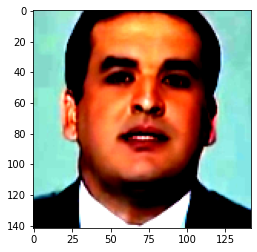

In [15]:
# used *arg here for -> img,label=dataset[0] -> shortcut
show_example(*dataset[0])

Label:  fake (0)


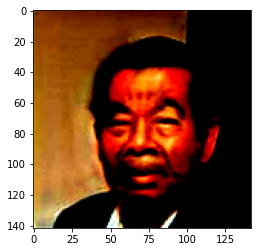

In [16]:
show_example(*dataset[1099])

Label:  real (1)


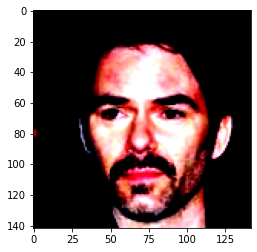

In [17]:
show_example(*dataset[17999])

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (18000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [18]:
random_seed = 43
torch.manual_seed(random_seed);

In [19]:
val_size = 1800
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(16200, 1800)

We can now create data loaders for training and validation, to load the data in batches

In [20]:
from torch.utils.data.dataloader import DataLoader

batch_size=85

In [21]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


We can look at batches of images from the dataset using the `make_grid` method from `torchvision`. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

Let's take a look at some sample images from the training dataloader. To display the images, we'll need to _denormalize_ the pixels values to bring them back into the range `(0,1)`.

In [22]:
from torchvision.utils import make_grid
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

# to remove normalized pixels
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

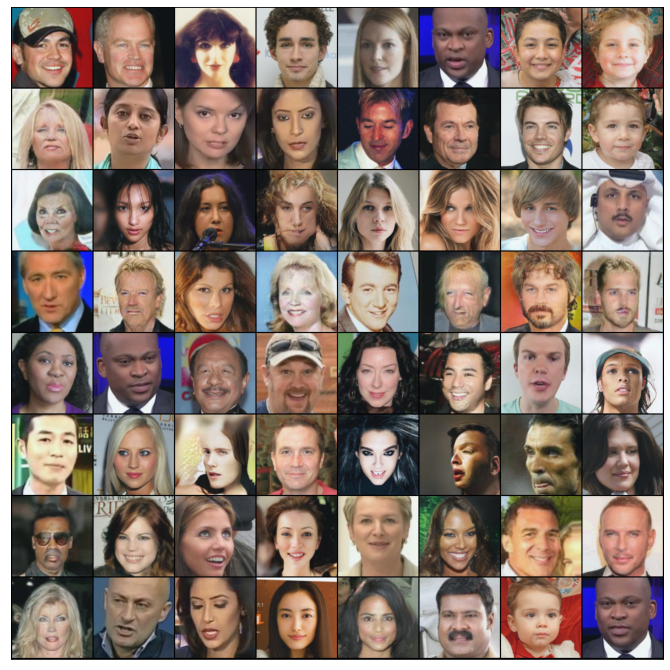

In [23]:
show_batch(train_dl)

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

In [24]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [26]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [27]:
import torch.nn as nn
import torch.nn.functional as F

In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

## Model with Residual Blocks and Batch Normalization

One of the key changes to our CNN model this time is the addition of the resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

So, lets build our model now:

In [29]:
# def conv_block(in_channels, out_channels, pool=False):
#     layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
#               nn.BatchNorm2d(out_channels), 
#               nn.ReLU(inplace=True)]
#     if pool: layers.append(nn.MaxPool2d(2))
#     return nn.Sequential(*layers)

# class ResNet9(ImageClassificationBase):
#     def __init__(self, in_channels, num_classes):
#         super().__init__()
        
#         self.conv1 = conv_block(in_channels, 64) # output: 64 x 128 x 128
#         self.conv2 = conv_block(64, 128, pool=True) # output: 128 x 64 x 64 ; as pool is true
#         self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
#         self.conv3 = conv_block(128, 256, pool=True)  # output: 256 x 32 x 32 
#         self.conv4 = conv_block(256, 512, pool=True)  # output: 512 x 16 x 16 
#         self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
#         self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), 
#                                         nn.Flatten(), 
#                                         nn.Dropout(0.2),
#                                         nn.Linear(512, num_classes)) # output: 512 x 1 x 1 
        
#     def forward(self, xb):
#         out = self.conv1(xb)
#         out = self.conv2(out)
#         out = self.res1(out) + out
#         out = self.conv3(out)
#         out = self.conv4(out)
#         out = self.res2(out) + out
#         out = self.classifier(out)
#         return out

In [30]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 34) # output: 64 x 128 x 128
        self.conv2 = conv_block(34, 64, pool=True) # output: 128 x 64 x 64 ; as pool is true
        self.res1 = nn.Sequential(conv_block(64, 64), conv_block(64, 64))
        
        self.conv3 = conv_block(64, 128)
        self.conv4 = conv_block(128,256, pool=True)
        self.res2 = nn.Sequential(conv_block(256,256), conv_block(256,256))
        
        self.conv5 = conv_block(256,512)  # output: 256 x 32 x 32 
        self.conv6 = conv_block(512, 512, pool=True)  # output: 512 x 16 x 16 
        self.res3 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes)) # output: 512 x 1 x 1 
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

In [31]:
model = to_device(ResNet9(3, 2), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 34, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(34, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(34, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    

In [32]:
torch.cuda.empty_cache()
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([85, 3, 142, 142])
out.shape: torch.Size([85, 2])
out[0]: tensor([-3.4206,  1.7709], device='cuda:0', grad_fn=<SelectBackward>)


In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we begin training, let's instantiate the model once again and see how it performs on the validation set with the initial set of parameters.

In [34]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 0.695112407207489, 'val_acc': 0.4873262345790863}]

The initial accuracy is around 50%, which is what one might expect from a randomly intialized model (since it has a 1 in 2 chance of getting a label right by guessing randomly).

We'll use the following *hyperparmeters* (learning rate, no. of epochs, batch_size etc.) to train our model. As an exercise, you can try changing these to see if you have achieve a higher accuracy in a shorter time. 

In [35]:
epochs = 12
max_lr = 0.001 # best1 for lr=0.0001 and size: 64 x 64 and batch size=50 over 99% GPU usage
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [36]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, grad_clip=grad_clip, weight_decay=weight_decay, opt_func=opt_func)
# time= 20min 30s

Epoch [0], last_lr: 0.00021, train_loss: 0.9316, val_loss: 0.6509, val_acc: 0.6305
Epoch [1], last_lr: 0.00060, train_loss: 0.7342, val_loss: 0.6684, val_acc: 0.6239
Epoch [2], last_lr: 0.00094, train_loss: 0.6735, val_loss: 0.6547, val_acc: 0.5970
Epoch [3], last_lr: 0.00099, train_loss: 0.6697, val_loss: 0.6249, val_acc: 0.6313
Epoch [4], last_lr: 0.00093, train_loss: 0.6232, val_loss: 0.6133, val_acc: 0.6766
Epoch [5], last_lr: 0.00081, train_loss: 0.5701, val_loss: 0.5498, val_acc: 0.6996
Epoch [6], last_lr: 0.00065, train_loss: 0.4998, val_loss: 0.4075, val_acc: 0.8027
Epoch [7], last_lr: 0.00046, train_loss: 0.4080, val_loss: 0.5940, val_acc: 0.7078
Epoch [8], last_lr: 0.00028, train_loss: 0.3031, val_loss: 0.2884, val_acc: 0.8707
Epoch [9], last_lr: 0.00013, train_loss: 0.2240, val_loss: 0.2175, val_acc: 0.9052
Epoch [10], last_lr: 0.00003, train_loss: 0.1590, val_loss: 0.2069, val_acc: 0.9059
Epoch [11], last_lr: 0.00000, train_loss: 0.1178, val_loss: 0.1539, val_acc: 0.9324
CP

In [37]:
# %%time
# history += fit_one_cycle(12, 0.00001, model, train_dl, val_dl, grad_clip=grad_clip, weight_decay=weight_decay, opt_func=opt_func)

In [38]:
%%time
history += fit_one_cycle(25, max_lr, model, train_dl, val_dl, grad_clip=grad_clip, weight_decay=weight_decay, opt_func=opt_func)

Epoch [0], last_lr: 0.00008, train_loss: 0.1407, val_loss: 0.1857, val_acc: 0.9147
Epoch [1], last_lr: 0.00020, train_loss: 0.1565, val_loss: 0.4556, val_acc: 0.8442
Epoch [2], last_lr: 0.00037, train_loss: 0.2318, val_loss: 0.2202, val_acc: 0.9002
Epoch [3], last_lr: 0.00057, train_loss: 0.2574, val_loss: 0.5550, val_acc: 0.7970
Epoch [4], last_lr: 0.00076, train_loss: 0.2651, val_loss: 0.4678, val_acc: 0.7975
Epoch [5], last_lr: 0.00091, train_loss: 0.2603, val_loss: 0.4153, val_acc: 0.8337
Epoch [6], last_lr: 0.00099, train_loss: 0.2420, val_loss: 0.1838, val_acc: 0.9232
Epoch [7], last_lr: 0.00100, train_loss: 0.2069, val_loss: 0.4447, val_acc: 0.8386
Epoch [8], last_lr: 0.00098, train_loss: 0.1690, val_loss: 0.3156, val_acc: 0.8629
Epoch [9], last_lr: 0.00095, train_loss: 0.1630, val_loss: 0.4907, val_acc: 0.8180
Epoch [10], last_lr: 0.00090, train_loss: 0.1383, val_loss: 0.1297, val_acc: 0.9437
Epoch [11], last_lr: 0.00085, train_loss: 0.1027, val_loss: 0.1232, val_acc: 0.9529
Ep

In [39]:
# %%time
# history += fit_one_cycle(12, 0.0001, model, train_dl, val_dl, grad_clip=grad_clip, weight_decay=weight_decay, opt_func=opt_func)

After running the model for about 20-30 minutes we extract the best possible accuracy on validation set which is : ~98%.
Now, lets try to plot how accuracy vs epochs and learning rate vs epoch as shown below:

In [40]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

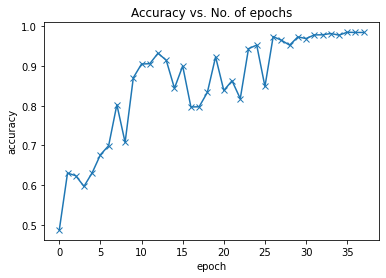

In [41]:
plot_accuracies(history)

In [42]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

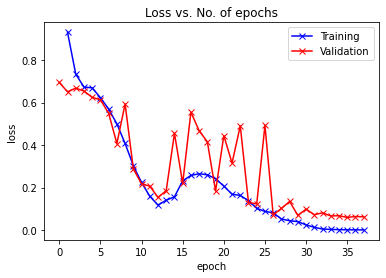

In [43]:
plot_losses(history)

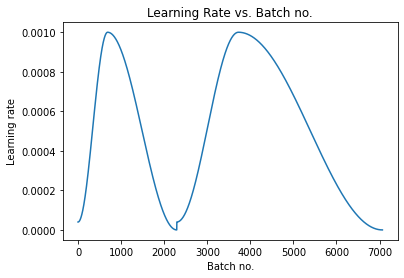

In [44]:
import numpy as np
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');
plot_lrs(history)

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined validation dataset of 9000 images.


In [45]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: real , Predicted: real


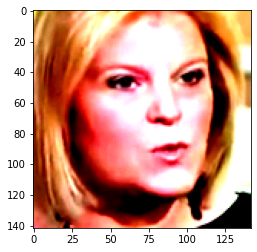

In [46]:
img, label = val_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', classes_here[label], ', Predicted:', predict_image(img, model))

In [47]:
%config Completer.use_jedi = False

# ***Preparing Final Submission***

Making prediction on test set and saving prediction to 'submit_me.csv' file for final submission.

In [48]:
import pandas as pd
from PIL import Image

# test images directory
test_dir=data_dir+'/test'
submission=pd.read_csv(data_dir+"/sample_submission.csv")
final_submission=submission.copy()

# to trabsform image
transforms_test=tt.Compose([tt.Resize(142), 
                            tt.RandomHorizontalFlip(), 
                             #tt.RandomResizedCrop(64, scale=(0.5,0.9), ratio=(1, 1)), 
                             #tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                             #tt.RandomCrop(64, padding=4, padding_mode='reflect'),
                             tt.ToTensor(),
                             tt.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
                                            ])

for img in os.listdir(test_dir):
    img_str=img
    address=test_dir+"/"+str(img)
    img=Image.open(address)
    img=transforms_test(img)
    prediction=predict_image(img, model)
    final_submission.loc[final_submission['path']=='data/test/'+str(img_str),'label']=str(prediction)
    
    # to print image uncomment this
    #plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
    #print('Label:', classes_here[label], ', Predicted:', predict_image(img, model))
    
    
final_submission.to_csv('Submit_me.csv', index=False)






#test_dataset = ImageFolder(data_dir+'/test', )